In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as mtick
import numpy as np
import uncertainties.unumpy as unp
import matplotlib.transforms as mtransforms

from plot_helpers import _load_results_helper, sup_label

# customizations
rcParams['axes.autolimit_mode'] = 'round_numbers'
rcParams['axes.labelsize'] = 'large'
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams['axes.axisbelow'] = True
rcParams['font.family'] = 'serif'
rcParams['pdf.use14corefonts'] = True
rcParams['savefig.bbox'] = 'tight'
rcParams['font.size'] = 12.0
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

plt.style.use('tableau-colorblind10')

In [2]:
openmc_keff, _, time = _load_results_helper('openmc_results/saltproc_runtime')
serpent_keff, _, _ = _load_results_helper('serpent_results/saltproc_runtime')

In [3]:
len(openmc_keff)

244

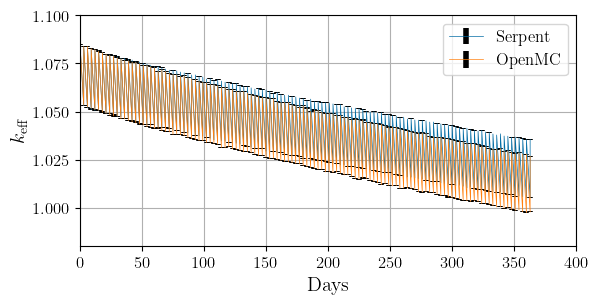

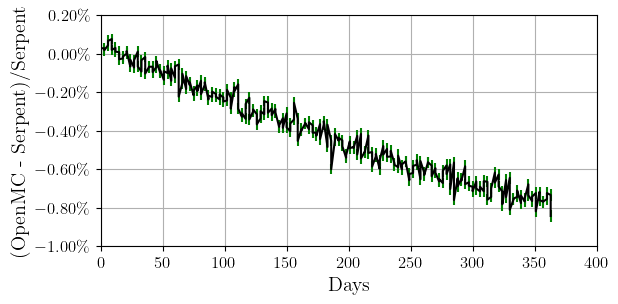

In [4]:
i = (244) - 1
openmc_keff = openmc_keff[:i]
serpent_keff = serpent_keff[:i]
time = time[:i]

fig1, ax1 = plt.subplots(figsize=(6.4,3.0))
fig2, ax2 = plt.subplots(figsize=(6.4,3.0))
for o in  [(serpent_keff, 'Serpent'), (openmc_keff, 'OpenMC')]:
    keff, name = o
    ks = []
    for k in keff:
        ks += [[k.n, k.s]]
    ks = np.array(ks)
    ax1.errorbar(time, ks[:,0], yerr=ks[:,1], linewidth=0.5, label=f'{name}', fmt='-', ecolor='black', elinewidth=4)
    ax1.legend()
    if name == 'OpenMC':
        kerr = (openmc_keff - serpent_keff) / serpent_keff
        k_err = []
        k_err_err = []
        for k in kerr:
            k_err.append(k.n)
            k_err_err.append(k.s)
        ax2.errorbar(time, k_err, yerr=k_err_err, fmt='-', color='black', ecolor='green')
        #ax2.plot(time[1:], k_err)
#locs = ind + height*(len(burn_indices)/2 - 0.5)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, 2))

ax2.set_xlabel('Days')
ax1.grid()    
ax1.set_xlabel('Days')
ax2.set_xlabel('Days')
ax1.set_ylabel(r'$k_\text{eff}$')
ax2.set_ylabel(r'(OpenMC - Serpent)/Serpent')
ax2.grid()    
#for label, ax in zip(('(a)', '(b)'), ax1):
#    # label physical distance in and down:
#    trans = mtransforms.ScaledTranslation(2.4, 0.2, fig1.dpi_scale_trans)
#    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
#            fontsize='medium', verticalalignment='top', fontfamily='serif')

In [5]:
fig1.savefig('../figs/ch5/keff.pdf')
fig2.savefig('../figs/ch5/keff_error.pdf')

In [6]:
np.average((openmc_keff - serpent_keff)[:10])

0.00035353899002075193+/-9.697259683932444e-05

In [7]:
time[10]

15.0